In [20]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com

In [21]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [22]:
cursor = remote.cursor(buffered=True)
cursor.execute("""
                SELECT 
                ct.type AS 기업규모,
                ROUND(AVG(co.employees)) AS 총사원수
                FROM 
                    company_info co
                JOIN 
                    comp_type ct ON co.comp_type_id = ct.comp_type_id
                WHERE 
                    ct.type != "정보없음" 
                    AND ct.type != "기타" 
                    AND ct.type NOT LIKE "%코스%"
                GROUP BY 
                    ct.type
                ORDER BY 
                    총사원수 DESC;
""")
result = cursor.fetchall()

df = pd.DataFrame(result)

df.columns = ["기업규모", "수"]

df

,기업규모,수
0,대기업,349
1,중견기업,210
2,강소기업,141
3,공기업,112
4,스타트업,55
5,중소기업,32
6,벤처기업,22


In [23]:
# 기업규모 정렬 순서 설정
order = ["스타트업", "벤처기업", "강소기업", "중소기업", "중견기업", "공기업", "대기업"]
df["기업규모"] = pd.Categorical(df["기업규모"], categories=order, ordered=True)

# DataFrame 정렬
df = df.sort_values(by=["기업규모", "수"]).reset_index(drop=True)

df

,기업규모,수
0,스타트업,55
1,벤처기업,22
2,강소기업,141
3,중소기업,32
4,중견기업,210
5,공기업,112
6,대기업,349


In [24]:
df.drop(index=5, inplace= True)

df.reset_index(drop=True)

df

,기업규모,수
0,스타트업,55
1,벤처기업,22
2,강소기업,141
3,중소기업,32
4,중견기업,210
6,대기업,349


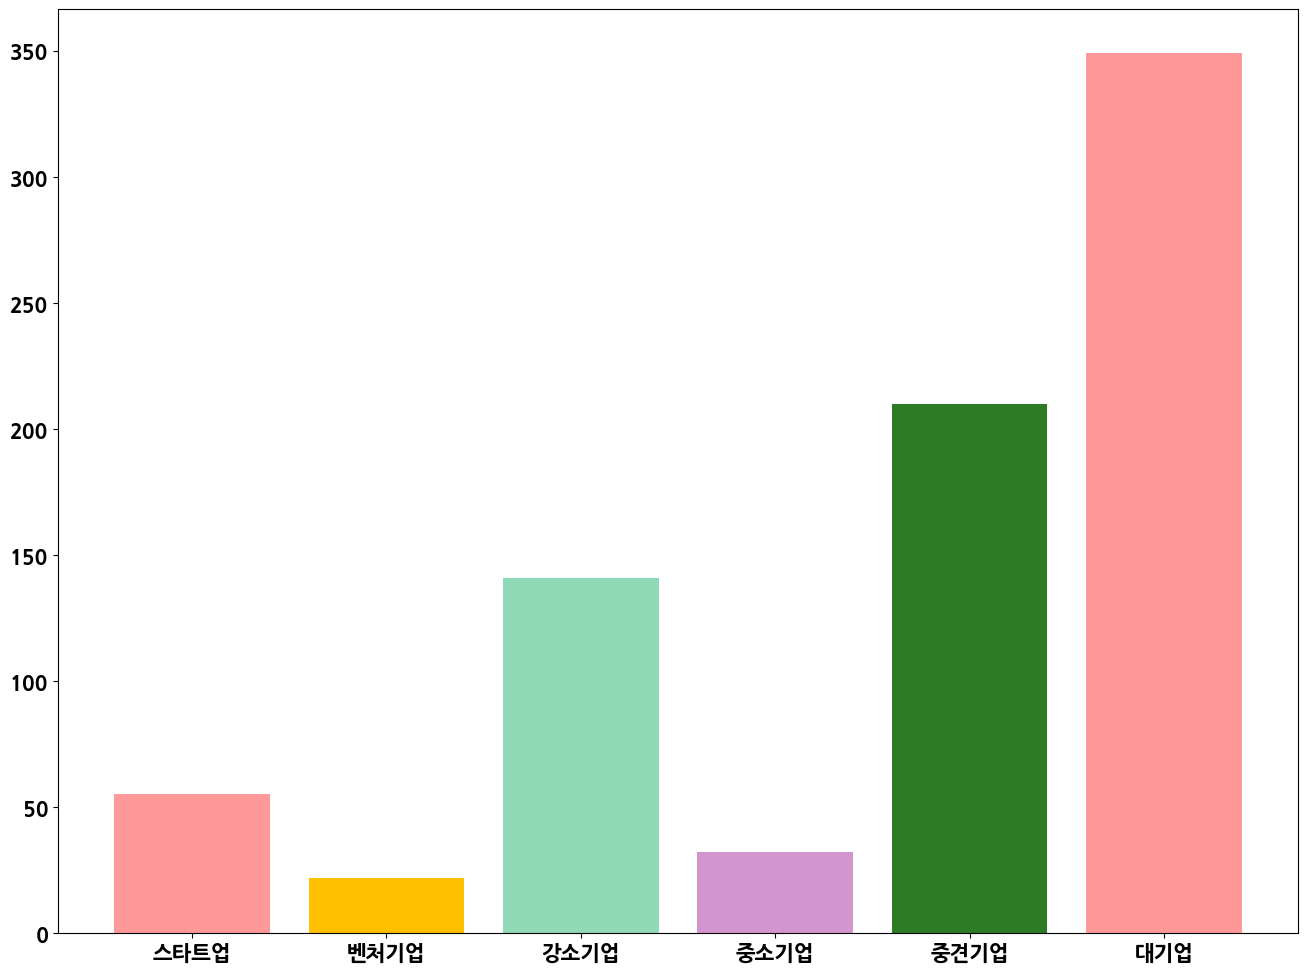

In [27]:
# 한글 폰트 설정 (Linux: NanumGothic)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'
]

plt.figure(figsize=(16, 12))
plt.bar(df["기업규모"], df["수"], color=colors[:len(df)])

plt.xticks(fontsize=15, fontweight="bold")  # x축 레이블 크기
plt.yticks(fontsize=15, fontweight="bold")  # y축 레이블 크기

plt.show()

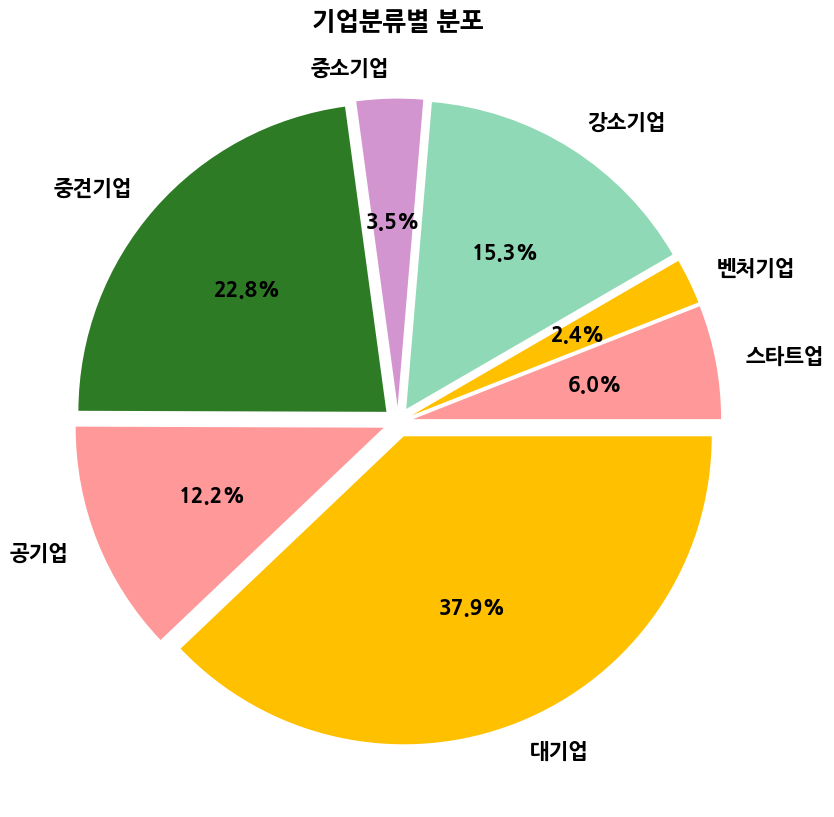

In [16]:
# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 경로 확인 필수
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 그래프 크기 설정
plt.figure(figsize=(10, 10))

# 파이차트 색상 및 explode 설정
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#2E7B26"]
explode = [0.05] * len(df["수"])  # 각 항목을 분리

# 파이차트 생성
plt.pie(
    df["수"],
    labels=df["기업규모"],
    autopct="%.1f%%",  # 퍼센트 표시
    explode=explode,  # 각 항목 분리
    colors=colors,
    textprops={'fontsize': 15, 'fontweight': 'bold'}  # 텍스트 크기 및 굵기 설정
)

# 그래프 제목 추가
plt.title("기업분류별 분포", fontsize=18, fontweight='bold')

# 그래프 표시
plt.show()
